<a href="https://colab.research.google.com/github/Alainm74/DataAnalystPortafolio/blob/main/Machine_Learning_Text_Analysis_Python_Alain_Monroy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MACHINE LEARNING AND PATTERN RECOGNITION

##Author
Ruben Alain Monroy Perez Negron



##Abstract

This project involves conducting text analytics on a dataset of poems to understand the genres represented within the text. The dataset, stored in the "Poem_Data.csv" file, is preprocessed using various text mining techniques, including cleaning, lemmatization, and feature extraction. The analysis focuses on four genres: Affection, Death, Environment, and Music.

The project begins with exploratory data analysis and preprocessing steps, handling missing values and cleaning the text data. A word cloud is generated for each genre, illustrating the top 15 words, providing insights into the frequent themes within each category. Additionally, a classification model, specifically a Logistic Regression model and a Naive Bayes classifier, is built to predict the genre of a given poem. The models are evaluated using metrics such as accuracy, precision, recall, and F1-score, with the results presented in a well-structured confusion matrix.

The findings from the word frequency word clouds and the performance of the sentiment analysis models are summarized in the conclusion. It is observed that the Logistic Regression model outperforms the Naive Bayes classifier in terms of macro avg F1 score. However, areas for potential improvement are identified, including the consideration of more extensive datasets, additional data preprocessing steps, and tuning of model hyperparameters.

The project provides valuable insights into the genres of poems, showcasing the application of text analytics and classification techniques in understanding and predicting literary themes.

##1.Introduction
Using the Poem file "Poem_Data.csv":
1. Perform text analytics to understand the Genre described within Poem by performing the appropriate pre-processing for text data and create a word cloud illustrating the frequency of the top 15 words used in each type of genre (affection, death, and environment, and music so 4 word clouds in total).

2. Next, build a simple classification model (such as a Naive Bayes classifier or Logistic Regression) to predict the genre of the poem.

3. Evaluate your model using appropriate metrics (e.g., accuracy, precision, recall, F1-score) and present these results in a well-structured confusion matrix.

4. Conclusion/Summary of the findings and their implications based on the word frequency word clouds and the performance of the sentiment analysis model.




##2.Text Mining analysis



###2.1 Setup

Read and explore the dataset

####2.1.1 Import libraries:

In [ ]:
import re, nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.svm import LinearSVC
import joblib
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


####2.1.2 Reading dataset as dataframe

In [ ]:
df = pd.read_csv("/content/Poem_Data.csv")
pd.set_option('display.max_colwidth', None) # Setting this so we can see the full content of cells
pd.set_option('display.max_columns', None) # to make sure we can see all the columns in output window


In [ ]:
df

,Genre,Poem
0,Music,NaN
1,Music,"In the thick brushthey spend the hottest part of the day, soaking their hoovesin the trickle of mountain water the ravine hoardson behalf of the oleander."
2,Music,"Storms are generous. Something so easy to surrender to, sitting by the window, and then you step out into the garden you were so bored of,"
3,Music,"—After Ana Mendieta Did you carry around the matin star? Did you hold forest-fire in one hand? Would you wake to radiate, shimmer, gleam lucero-light? Through the morning would you measure the wingspan of an idea taking off— & by night would"
4,Music,"for Aja Sherrard at 20The portent may itself be memory. —Wallace StevensHow hard to carry scores of adults on your back,not look at them as carrions of need, the distressof what loyalty requires. This pain is"
...,...,...
836,Environment,"Why make so much of fragmentary blue In here and there a bird, or butterfly, Or flower, or wearing-stone, or open eye, When heaven presents in sheets the solid hue?Since earth is earth, perhaps, not heaven (as yet)— Though some savants make earth include the sky; And blue so far above us comes so high, It"
837,Environment,"Woman, I wish I didn't know your name. What could you be? Silence in my house& the front yard where the dogwoodwouldn't make up its mind about flowers.Aren't you Nature? A stem cringing, half- shadowed beneath a torque of rain.I too am leaving. I too am"
838,Environment,"Yonder to the kiosk, beside the creek, Paddle the swift caque. Thou brawny oarsman with the sunburnt cheek, Quick! for it soothes my heart to hear the Bulbul speak.Ferry me quickly to the Asian shores, Swift bending to your oars. Beneath"
839,Environment,"You come to fetch me from my work to-night When supper's on the table, and we'll see If I can leave off burying the white Soft petals fallen from the apple tree. (Soft petals, yes, but not so barren quite, Mingled with these, smooth bean and wrinkled pea;) And go along with you ere you lose"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   841 non-null    object
 1   Poem    837 non-null    object
dtypes: object(2)
memory usage: 13.3+ KB


In [ ]:
df.isnull().sum()

Genre    0
Poem     4
dtype: int64

In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df

,Genre,Poem
1,Music,"In the thick brushthey spend the hottest part of the day, soaking their hoovesin the trickle of mountain water the ravine hoardson behalf of the oleander."
2,Music,"Storms are generous. Something so easy to surrender to, sitting by the window, and then you step out into the garden you were so bored of,"
3,Music,"—After Ana Mendieta Did you carry around the matin star? Did you hold forest-fire in one hand? Would you wake to radiate, shimmer, gleam lucero-light? Through the morning would you measure the wingspan of an idea taking off— & by night would"
4,Music,"for Aja Sherrard at 20The portent may itself be memory. —Wallace StevensHow hard to carry scores of adults on your back,not look at them as carrions of need, the distressof what loyalty requires. This pain is"
5,Music,"for Bob Marley, Bavaria, November 1980 Here is the brilliant morning on a fishing boat, this is the dream a dying man has in midwinter, the world covered in light and shadow—he dreams of St. Ann’s"
...,...,...
836,Environment,"Why make so much of fragmentary blue In here and there a bird, or butterfly, Or flower, or wearing-stone, or open eye, When heaven presents in sheets the solid hue?Since earth is earth, perhaps, not heaven (as yet)— Though some savants make earth include the sky; And blue so far above us comes so high, It"
837,Environment,"Woman, I wish I didn't know your name. What could you be? Silence in my house& the front yard where the dogwoodwouldn't make up its mind about flowers.Aren't you Nature? A stem cringing, half- shadowed beneath a torque of rain.I too am leaving. I too am"
838,Environment,"Yonder to the kiosk, beside the creek, Paddle the swift caque. Thou brawny oarsman with the sunburnt cheek, Quick! for it soothes my heart to hear the Bulbul speak.Ferry me quickly to the Asian shores, Swift bending to your oars. Beneath"
839,Environment,"You come to fetch me from my work to-night When supper's on the table, and we'll see If I can leave off burying the white Soft petals fallen from the apple tree. (Soft petals, yes, but not so barren quite, Mingled with these, smooth bean and wrinkled pea;) And go along with you ere you lose"


###2.2 Data pre-processing

####2.2.1 Creating function for cleaning data

In [ ]:
def cleaner(poem):
    soup = BeautifulSoup(poem, 'lxml') # removing HTML entities such as ‘&amp’,’&quot’,'&gt'; lxml is the html parser and shoulp be installed using 'pip install lxml'
    souped = soup.get_text()
    re1 = re.sub(r"(@|http://|https://|www|\\x)\S*", " ", souped) # substituting @mentions, urls, etc with whitespace
    re2 = re.sub("[^A-Za-z]+"," ", re1) # substituting any non-alphabetic character that repeats one or more times with whitespace

    """
    For more info on regular expressions visit -
    https://docs.python.org/3/howto/regex.html
    """

    tokens = nltk.word_tokenize(re2)
    lower_case = [t.lower() for t in tokens]

    stop_words = set(stopwords.words('english'))
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))

    wordnet_lemmatizer = WordNetLemmatizer() #ing words
    lemmas = [wordnet_lemmatizer.lemmatize(t,'v') for t in filtered_result]
    return lemmas


Adding time taken

In [ ]:
import time
start_svc = time.time()
df['cleaned_poem'] = df.Poem.apply(cleaner)
df = df[df['cleaned_poem'].map(len) > 0] # removing rows with cleaned proem of length 0
end_svc = time.time()

time_taken = end_svc-start_svc

print(f"Time taken is: {time_taken}")
print("Printing top 5 rows of dataframe showing original and cleaned poem....")



<ipython-input-77-0cc97b0a8820>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(poem, 'lxml') # removing HTML entities such as ‘&amp’,’&quot’,'&gt'; lxml is the html parser and shoulp be installed using 'pip install lxml'


Time taken is: 1.0943684577941895
Printing top 5 rows of dataframe showing original and cleaned poem....


<ipython-input-78-37913663b48d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_poem'] = df.Poem.apply(cleaner)


In [ ]:
print(df[['Poem','cleaned_poem']].head())
df.drop(['Poem'], axis=1, inplace=True)

                                                                                                                                                                                                                                                 Poem  \
1                                                     In the thick brushthey spend the hottest part of the day,              soaking their hoovesin the trickle of mountain water              the ravine hoardson behalf of the oleander.              
2                                                        Storms are generous.                                      Something so easy to surrender to, sitting by the window, and then you step out into the garden you were so bored of,                
3   —After Ana Mendieta Did you carry around the matin star? Did you hold forest-fire in one hand? Would you wake to radiate, shimmer, gleam lucero-light? Through the morning would you measure the wingspan of an idea taking off— & by night would   
4   

####2.2.2 Saving cleaned poems to csv file

In [ ]:
df.to_csv('cleaned_data.csv', index=False)
new_data= df['cleaned_poem'] = [" ".join(row) for row in df['cleaned_poem'].values] # joining tokens to create strings. TfidfVectorizer does not accept tokens as input

In [ ]:
df

,Genre,cleaned_poem
1,Music,thick brushthey spend hottest part day soak hoovesin trickle mountain water ravine hoardson behalf oleander
2,Music,storm generous something easy surrender sit window step garden bore
3,Music,ana mendieta carry around matin star hold forest fire one hand would wake radiate shimmer gleam lucero light morning would measure wingspan idea take night would
4,Music,aja sherrard portent may memory wallace stevenshow hard carry score adults back look carrions need distressof loyalty require pain
5,Music,bob marley bavaria november brilliant morning fish boat dream die man midwinter world cover light shadow dream st ann
...,...,...
836,Environment,make much fragmentary blue bird butterfly flower wear stone open eye heaven present sheet solid hue since earth earth perhaps heaven yet though savants make earth include sky blue far us come high
837,Environment,woman wish know name could silence house front yard dogwoodwouldn make mind flower nature stem cringe half shadow beneath torque rain leave
838,Environment,yonder kiosk beside creek paddle swift caque thou brawny oarsman sunburnt cheek quick soothe heart hear bulbul speak ferry quickly asian shore swift bend oars beneath
839,Environment,come fetch work night supper table see leave bury white soft petals fall apple tree soft petals yes barren quite mingle smooth bean wrinkle pea go along ere lose


In [ ]:
df['cleaned_poem']

1                                                                                               thick brushthey spend hottest part day soak hoovesin trickle mountain water ravine hoardson behalf oleander
2                                                                                                                                       storm generous something easy surrender sit window step garden bore
3                                         ana mendieta carry around matin star hold forest fire one hand would wake radiate shimmer gleam lucero light morning would measure wingspan idea take night would
4                                                                        aja sherrard portent may memory wallace stevenshow hard carry score adults back look carrions need distressof loyalty require pain
5                                                                                     bob marley bavaria november brilliant morning fish boat dream die man midwinter world cover light 

In [ ]:
data = df['cleaned_poem']
Y = df['Genre'] # target column
tfidf = TfidfVectorizer(min_df=.00015, ngram_range=(1,1)) # min_df=.000015 means that each ngram (unigram) must be present in at least 30 documents for it to be considered as a token (200000*.00015=30). Feature engineering
tfidf.fit(data) # learn vocabulary of entire data
data_tfidf = tfidf.transform(data) # creating tfidf values
pd.DataFrame(pd.Series(tfidf.get_feature_names_out())).to_csv('vocabulary.csv', header=False, index=False)
print("Shape of tfidf matrix: ", data_tfidf.shape)
data

Shape of tfidf matrix:  (837, 6860)


1                                                                                               thick brushthey spend hottest part day soak hoovesin trickle mountain water ravine hoardson behalf oleander
2                                                                                                                                       storm generous something easy surrender sit window step garden bore
3                                         ana mendieta carry around matin star hold forest fire one hand would wake radiate shimmer gleam lucero light morning would measure wingspan idea take night would
4                                                                        aja sherrard portent may memory wallace stevenshow hard carry score adults back look carrions need distressof loyalty require pain
5                                                                                     bob marley bavaria november brilliant morning fish boat dream die man midwinter world cover light 

In [ ]:
from collections import Counter
Counter(Y)

Counter({'Music': 238, 'Death': 231, 'Affection': 141, 'Environment': 227})

####2.2.3 Identify top 15 words per Genre

In [ ]:
UniqueGenre = df['Genre'].unique()
UniqueGenre

array(['Music', 'Death', 'Affection', 'Environment'], dtype=object)

####2.2.4 Splitting dataframe as per Genre

In [ ]:
df_music = df[df['Genre'] == 'Music']
df_death = df[df['Genre'] == 'Death']
df_affection = df[df['Genre'] == 'Affection']
df_environment = df[df['Genre'] == 'Environment']

####2.2.5 Creating function for Count words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def count_words (df):
  vec = CountVectorizer().fit(df)
  bag_of_words = vec.transform(df)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:15]

#####2.2.5.a Top 15 words - Genre: music

In [ ]:
count_words(df_music['cleaned_poem'])

[('say', 47),
 ('like', 44),
 ('one', 38),
 ('make', 32),
 ('go', 28),
 ('love', 27),
 ('think', 26),
 ('come', 25),
 ('let', 24),
 ('body', 24),
 ('man', 23),
 ('light', 22),
 ('time', 21),
 ('many', 21),
 ('tell', 20)]

#####2.2.5.b Top 15 words - Genre: death

In [ ]:
count_words(df_death['cleaned_poem'])

[('die', 51),
 ('one', 41),
 ('like', 35),
 ('dead', 33),
 ('know', 32),
 ('death', 31),
 ('come', 30),
 ('go', 29),
 ('night', 28),
 ('make', 27),
 ('say', 25),
 ('mother', 25),
 ('white', 24),
 ('see', 22),
 ('day', 22)]

#####2.2.5.c Top 15 words - Genre: affection

In [ ]:
count_words(df_affection['cleaned_poem'])

[('love', 63),
 ('like', 30),
 ('come', 28),
 ('say', 26),
 ('make', 21),
 ('look', 20),
 ('white', 19),
 ('heart', 19),
 ('day', 18),
 ('eye', 17),
 ('see', 16),
 ('go', 16),
 ('one', 15),
 ('tell', 15),
 ('never', 14)]

#####2.2.5.d Top 15 words - Genre: environment

In [ ]:
count_words(df_environment['cleaned_poem'])

[('tree', 45),
 ('like', 43),
 ('one', 34),
 ('go', 34),
 ('night', 33),
 ('sun', 31),
 ('sky', 29),
 ('see', 28),
 ('make', 28),
 ('leave', 26),
 ('come', 25),
 ('white', 25),
 ('moon', 24),
 ('wind', 24),
 ('blue', 22)]

####2.2.6 Wordcloud

Sources:
* https://python-charts.com/ranking/wordcloud-matplotlib/?utm_content=cmp-true
* https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe
* https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from io import BytesIO
import requests

#####2.2.6.a Wordcloud - Genre:music

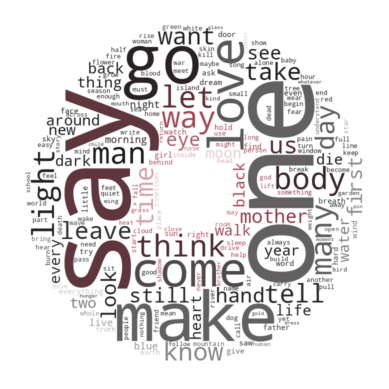

In [ ]:
#music image
response = requests.get("https://img.freepik.com/free-photo/vinyl-record-isolated_469584-14.jpg?w=740&t=st=1702492736~exp=1702493336~hmac=00031ab579bcb6110b9f19d2763f2669f0c139cca5c09de34a902101bc51958f")
mask = np.array(Image.open(BytesIO(response.content)))

#colours
image_colors = ImageColorGenerator(mask)


Music = df_music['cleaned_poem'].values
wordcloud = WordCloud(background_color = "white", repeat = True, mask = mask).generate(str(Music))


# Generate plot
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation = "bilinear")
plt.show()




#####2.2.6.b Wordcloud - Genre:death

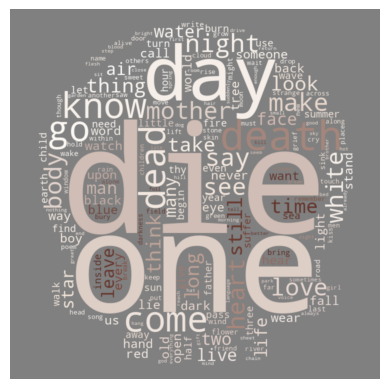

In [ ]:
#death image
response = requests.get("https://img.freepik.com/free-psd/skull-illustration_23-2150689292.jpg?w=740&t=st=1702493337~exp=1702493937~hmac=dd7690c395498151b75464588e2950bace88fac6d1a1e7a819d6900c60579625")
mask = np.array(Image.open(BytesIO(response.content)))

#colours
image_colors = ImageColorGenerator(mask)


death = df_death['cleaned_poem'].values
wordcloud = WordCloud(background_color = "grey", repeat = True, mask = mask).generate(str(death))


# Generate plot
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation = "bilinear")
plt.show()


#####2.2.6.c Wordcloud - Genre:affection

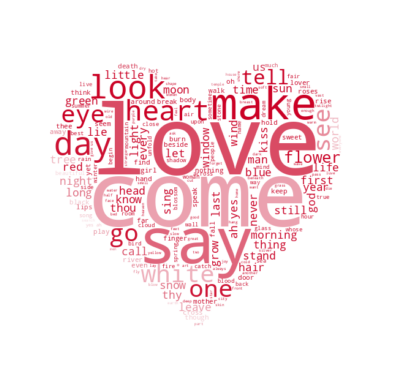

In [ ]:
#heart image
response = requests.get("https://raw.githubusercontent.com/R-CoderDotCom/samples/main/wordcloud-mask.jpg")
mask = np.array(Image.open(BytesIO(response.content)))

#colours
image_colors = ImageColorGenerator(mask)

affection = df_affection['cleaned_poem'].values
wordcloud = WordCloud(background_color = "white", repeat = True, mask = mask).generate(str(affection))

# Generate plot
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation = "bilinear")
plt.show()


#####2.2.6.d Wordcloud - Genre:environment

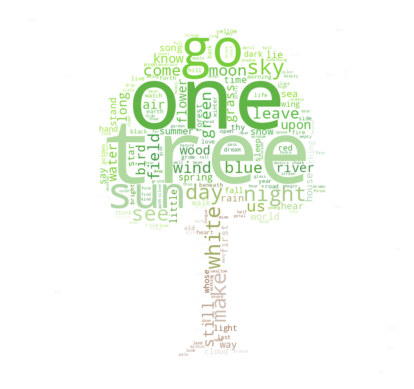

In [ ]:
#tree image
response = requests.get("https://image.pngaaa.com/750/1234750-middle.png")
mask = np.array(Image.open(BytesIO(response.content)))

#colours
image_colors = ImageColorGenerator(mask)

env = df_environment['cleaned_poem'].values
wordcloud = WordCloud(background_color = "white", repeat = True, mask = mask).generate(str(env))

# Generate plot
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation = "bilinear")
plt.show()


##3.Classification model to predict the genre of the poem.

###Naive Bayes classifier

sklearn.naive_bayes.MultinomialNB

Source:
* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
print("Shape of tfidf matrix: ", data_tfidf.shape)

Shape of tfidf matrix:  (837, 6860)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

import time
start_nbc = time.time()

# Convert Y to NumPy array (in order to avoid indexing problems)
Y = np.array(Y)

# Implementing GaussianNB
nbc_clf = MultinomialNB()

# Running cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) # 10-fold cross-validation
scores=[]
iteration = 0
for train_index, test_index in kf.split(data_tfidf, Y):
    iteration += 1
    print("Iteration ", iteration)
    X_train, Y_train = data_tfidf[train_index], Y[train_index]
    X_test, Y_test_nbc = data_tfidf[test_index], Y[test_index]
    nbc_clf.fit(X_train, Y_train) # Fitting GaussianNB
    Y_pred_nbc = nbc_clf.predict(X_test)
    score = metrics.accuracy_score(Y_test_nbc, Y_pred_nbc) # Calculating accuracy
    print("Cross-validation accuracy: ", score)
    scores.append(score) # appending cross-validation accuracy for each iteration
mean_accuracy = np.mean(scores)
print("Mean cross-validation accuracy: ", mean_accuracy)

end_nbc = time.time()
time_taken_nbc = end_nbc - start_nbc

print(f"Time taken is: {time_taken_nbc}")

Iteration  1
Cross-validation accuracy:  0.4166666666666667
Iteration  2
Cross-validation accuracy:  0.40476190476190477
Iteration  3
Cross-validation accuracy:  0.4642857142857143
Iteration  4
Cross-validation accuracy:  0.42857142857142855
Iteration  5
Cross-validation accuracy:  0.4642857142857143
Iteration  6
Cross-validation accuracy:  0.4880952380952381
Iteration  7
Cross-validation accuracy:  0.35714285714285715
Iteration  8
Cross-validation accuracy:  0.39759036144578314
Iteration  9
Cross-validation accuracy:  0.43373493975903615
Iteration  10
Cross-validation accuracy:  0.40963855421686746
Mean cross-validation accuracy:  0.426477337923121
Time taken is: 0.22179245948791504


###Logistic Regression

sklearn.linear_model.LogisticRegression

Source:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

import time
start_lr = time.time()

# Convert Y to NumPy array (in order to avoid indexing problems)
Y = np.array(Y)

# Implementing GaussianNB
lr = MultinomialNB()

# Running cross-validation
kf = StratifiedKFold(n_splits=15, shuffle=True, random_state=1) # 10-fold cross-validation
scores=[]
iteration = 0
for train_index, test_index in kf.split(data_tfidf, Y):
    iteration += 1
    print("Iteration ", iteration)
    X_train, Y_train = data_tfidf[train_index], Y[train_index]
    X_test, Y_test_lr = data_tfidf[test_index], Y[test_index]
    lr.fit(X_train, Y_train) # Fitting GaussianNB
    Y_pred_lr = lr.predict(X_test)
    score = metrics.accuracy_score(Y_test_lr, Y_pred_lr) # Calculating accuracy
    print("Cross-validation accuracy: ", score)
    scores.append(score) # appending cross-validation accuracy for each iteration
mean_accuracy = np.mean(scores)
print("Mean cross-validation accuracy: ", mean_accuracy)

end_lr = time.time()
time_taken_lr = end_lr - start_lr

print(f"Time taken is: {time_taken_lr}")

Iteration  1
Cross-validation accuracy:  0.375
Iteration  2
Cross-validation accuracy:  0.48214285714285715
Iteration  3
Cross-validation accuracy:  0.3392857142857143
Iteration  4
Cross-validation accuracy:  0.4642857142857143
Iteration  5
Cross-validation accuracy:  0.44642857142857145
Iteration  6
Cross-validation accuracy:  0.4107142857142857
Iteration  7
Cross-validation accuracy:  0.39285714285714285
Iteration  8
Cross-validation accuracy:  0.5
Iteration  9
Cross-validation accuracy:  0.5
Iteration  10
Cross-validation accuracy:  0.4107142857142857
Iteration  11
Cross-validation accuracy:  0.3392857142857143
Iteration  12
Cross-validation accuracy:  0.42857142857142855
Iteration  13
Cross-validation accuracy:  0.41818181818181815
Iteration  14
Cross-validation accuracy:  0.41818181818181815
Iteration  15
Cross-validation accuracy:  0.509090909090909
Mean cross-validation accuracy:  0.42898268398268397
Time taken is: 0.16252923011779785


##4.Evaluation of the model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion matrix and report for Naive Bayes classifier")
print(confusion_matrix(Y_test_nbc, Y_pred_nbc))
print(classification_report(Y_test_nbc, Y_pred_nbc))

print("Confusion matrix and report for Logistic Regression")
print(confusion_matrix(Y_test_lr, Y_pred_lr))
print(classification_report(Y_test_lr, Y_pred_lr))

Confusion matrix and report for Naive Bayes classifier
[[ 0  7  4  4]
 [ 0  8  6  9]
 [ 0  1 15  6]
 [ 0  8  4 11]]
              precision    recall  f1-score   support

   Affection       0.00      0.00      0.00        15
       Death       0.33      0.35      0.34        23
 Environment       0.52      0.68      0.59        22
       Music       0.37      0.48      0.42        23

    accuracy                           0.41        83
   macro avg       0.30      0.38      0.34        83
weighted avg       0.33      0.41      0.37        83

Confusion matrix and report for Logistic Regression
[[ 0  4  4  1]
 [ 0  8  3  5]
 [ 0  0 11  4]
 [ 0  4  2  9]]
              precision    recall  f1-score   support

   Affection       0.00      0.00      0.00         9
       Death       0.50      0.50      0.50        16
 Environment       0.55      0.73      0.63        15
       Music       0.47      0.60      0.53        15

    accuracy                           0.51        55
   macro a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

##5.Conclusion

Considering the macro avg f1 score and the time taken, the Logistic Regression Model is performing better. Hence, Logistic Regression model could be selected as the best model.

Based on the previous analysis, it can be concluded that the current predictive models are not achieving the best overall result. However, this could be improved by considering:
1. Amount of data, the current corpus may not contain enough documents.
2. Data pre-processing, additional cleaning of the initial data.
3. Words (feature selection) in the current analysis only unigrams are considered and by appearing at least in 0.00015 of the documents, this coul be inproved by modifying the min_df and selecting combination of words (bigram,trigram, etc).
4. Tunning the model by considering hyperparameters.